In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Advanced Pandas and Data Visualization in Python

## Task 1 "Import the pandas library as `pd`. Load two datasets `user_data` and `logs`. Check the table dimensions, variable types, and descriptive statistics."
**Question:** How many unique values does the `platform` variable have?

In [2]:
df_logs = pd.read_csv('D:/курс_архив/my_files/lesson_3/3_logs.csv')
df_logs

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629
...,...,...,...,...
4495,64496,False,computer,1585459072
4496,73299,True,phone,1585458370
4497,8967,True,phone,1585465121
4498,52880,False,phone,1585455362


In [3]:
df_user_data = pd.read_csv('D:/курс_архив/my_files/lesson_3/3_user_data.csv')
df_user_data

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49
...,...,...,...
2949,19411,False,29
2950,61579,False,50
2951,61221,True,64
2952,29863,False,46


In [5]:
# Check the number of unique values in the `platform` variable.
nunique_plarform = pd.unique(df_logs['platform'])
nunique_plarform

array(['phone', 'computer', 'tablet'], dtype=object)

# Task 2 "Which client completed the highest number of successful operations?"
## If multiple users have the same number of successful actions, list their IDs (`client`) separated by commas and spaces, in ascending order.

In [6]:
df_logs.query('success == True') \
    .groupby('client', as_index=False) \
    .agg({'success': 'count'}) \
    .sort_values(['success', 'client'], ascending=[False, False]).head(15)

,client,success
2626,92584,41
2345,82563,41
2231,78349,41
1759,61473,41
1758,61468,41
1487,52870,41
1020,36165,41
810,28719,41
332,12179,41
1826,64064,40


# Task 3 "From which platform were the most successful operations made?"

In [7]:
count_of_success = df_logs.query('success == True') \
    .groupby('platform', as_index=False) \
    .agg({'success': 'count'}) \
    .sort_values(['success', 'platform'], ascending=[False,False]).head(15)
count_of_success

,platform,success
1,phone,2019
0,computer,1090
2,tablet,180


# Task 4 "Which platform is the most popular among premium clients?"

In [8]:
# To do this, merge the two tables first, as premium client data is stored in the `df_user_data` table.
new_df = df_logs.merge(df_user_data, on='client',how='inner')
new_df

,client,success,platform,time,premium,age
0,61468,True,phone,1585425658,False,25
1,35604,False,phone,1585459894,True,65
2,10931,True,computer,1585468629,False,28
3,41928,True,phone,1585446772,False,46
4,48925,True,phone,1585467880,False,33
...,...,...,...,...,...,...
3434,92584,True,computer,1585408896,False,28
3435,95152,True,computer,1585420263,False,67
3436,64496,False,computer,1585459072,False,66
3437,8967,True,phone,1585465121,False,33


In [9]:
new_df.query('premium == True') \
    .groupby('platform', as_index = False) \
    .agg({'premium': 'count'}) \
    .sort_values('premium', ascending=False)

,platform,premium
1,phone,246
0,computer,150
2,tablet,24


# Task 5 "Visualize the age distribution of clients by client type (regular or premium) using the seaborn library with default color parameters. What kind of plot will result?"
## Use the dataset obtained in the previous step.

In [10]:
# Filter the dataset for premium and regular clients.
first = new_df.query('premium == True')
second = new_df.query('premium == False')

In [11]:
first

,client,success,platform,time,premium,age
1,35604,False,phone,1585459894,True,65
8,11983,True,phone,1585459511,True,68
11,99308,True,computer,1585409409,True,38
18,49625,False,phone,1585447789,True,65
23,53978,True,computer,1585408637,True,46
...,...,...,...,...,...,...
3366,20278,True,computer,1585456706,True,65
3394,78455,True,phone,1585459854,True,23
3396,57026,True,computer,1585438120,True,62
3417,2864,True,phone,1585459818,True,41


In [12]:
second

,client,success,platform,time,premium,age
0,61468,True,phone,1585425658,False,25
2,10931,True,computer,1585468629,False,28
3,41928,True,phone,1585446772,False,46
4,48925,True,phone,1585467880,False,33
5,32167,True,computer,1585457972,False,42
...,...,...,...,...,...,...
3434,92584,True,computer,1585408896,False,28
3435,95152,True,computer,1585420263,False,67
3436,64496,False,computer,1585459072,False,66
3437,8967,True,phone,1585465121,False,33


C:\Users\bedzh\AppData\Local\Temp\ipykernel_19004\3226151029.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(first.age)
C:\Users\bedzh\AppData\Local\Temp\ipykernel_19004\3226151029.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(second.age)


<Axes: xlabel='age', ylabel='Density'>

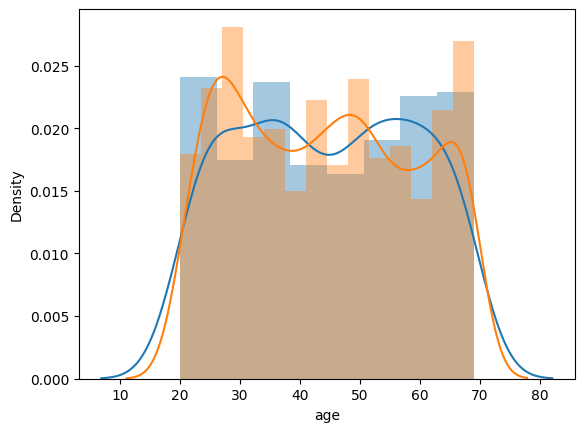

In [13]:
sns.distplot(first.age)
sns.distplot(second.age)

# Task 6 "Visualize the number of successful operations made on the `computer` platform by age using `sns.countplot`. On the x-axis – age, y-axis – number of successful operations. If the plot size is too small, you can add `plt.figure(figsize=(12, 8))` at the start of the corresponding cell."
**Question:** Which age group performed the highest number of successful actions?

In [14]:
# Filter the dataset for the `computer` platform and successful operations.
filtered_df = new_df.query('platform == "computer" and success == True')
filtered_df

,client,success,platform,time,premium,age
2,10931,True,computer,1585468629,False,28
5,32167,True,computer,1585457972,False,42
7,71087,True,computer,1585458446,False,36
10,39975,True,computer,1585428343,False,69
11,99308,True,computer,1585409409,True,38
...,...,...,...,...,...,...
3424,16540,True,computer,1585456144,False,49
3431,85769,True,computer,1585447052,False,46
3432,81031,True,computer,1585401631,False,45
3434,92584,True,computer,1585408896,False,28


<Axes: xlabel='age', ylabel='count'>

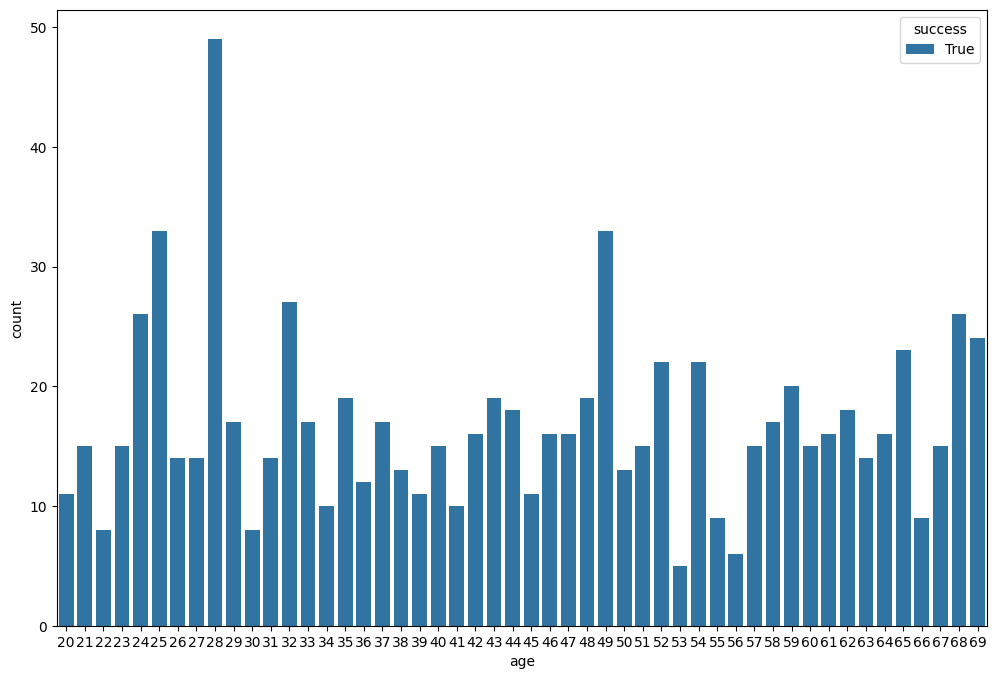

In [15]:
# Create the distribution plot.
plt.figure(figsize=(12, 8))
sns.countplot(x = 'age', hue = 'success', data = filtered_df)